In [2]:
import pandas as pd

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp

In [4]:
data = pd.read_csv("/Users/alekseyvalouev/Desktop/FireData/CSV/final_table_shifted.csv")

data = data.dropna(axis=0, subset=['fut1fire'])

data2 = pd.read_csv('/Users/alekseyvalouev/Desktop/FireData/CSV/final_table_years.csv')

data2 = data2.dropna(axis=0, subset=['fut1fire'])

data2 = data2.dropna(axis=0, subset=['36MoFires'])

In [70]:
data2.columns

Index(['newID', 'Date', 'YYYYMM', 'Year', 'VPD', 'PPT', 'TMAX', 'left', 'top',
       'HubDist', 'elev_meanm', 'slope_mean', 'popdensity', 'slope_dummy',
       '36MoFires', '12MoFires', 'Diff', '1Mo_VPD', '2Mo_VPD', '3Mo_VPD',
       '1Mo_TMAX', '2Mo_TMAX', '3Mo_TMAX', '1Mo_PPT', '2Mo_PPT', '3Mo_PPT',
       '12MoMeanVPD', '12MoMeanTMAX', '12MoMeanPPT', 'Month', 'Fire',
       'fut1fire', 'fut2fire', 'fut3fire'],
      dtype='object')

In [88]:
#data = data[pd.to_datetime(data['Date']).dt.strftime('%B') == 'June']
#data2 = data2[pd.to_datetime(data2['Date']).dt.strftime('%B') == 'June']

data2 = data2.sort_values(["Date", "newID"])
data2

,newID,Date,YYYYMM,Year,VPD,PPT,TMAX,left,top,HubDist,...,2Mo_PPT,3Mo_PPT,12MoMeanVPD,12MoMeanTMAX,12MoMeanPPT,Month,Fire,fut1fire,fut2fire,fut3fire
36,1,2002-01-01,200201,2002,4.283429,350.124429,11.391571,-124.301341,42.055424,3658.694708,...,14.109857,17.405143,6.335667,15.226559,137.125548,0.0,0,0.0,0.0,0.0
313,2,2002-01-01,200201,2002,3.826500,400.322505,10.289834,-124.201341,42.055424,4926.625172,...,13.638500,20.400333,9.725583,17.123194,147.513195,0.0,0,0.0,0.0,0.0
590,3,2002-01-01,200201,2002,3.453833,432.551997,9.616500,-124.101341,42.055424,11649.734645,...,13.258000,21.137000,11.526361,17.932514,156.439597,0.0,0,0.0,0.0,0.0
867,4,2002-01-01,200201,2002,4.441556,491.909336,8.627889,-124.001341,42.055424,17830.887457,...,12.341111,20.358889,14.074556,18.259870,180.370926,0.0,0,0.0,0.0,0.0
1144,5,2002-01-01,200201,2002,4.626500,519.459508,7.754333,-123.901341,42.055424,9621.080189,...,11.172667,19.092667,13.839278,17.358403,191.672485,0.0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216859,4512,2021-12-01,202112,2021,19.652550,10.393700,21.511600,-115.701341,32.655424,8199.756390,...,31.235800,39.572899,41.707737,31.771062,3.247512,-0.5,0,0.0,NaN,NaN
1217136,4514,2021-12-01,202112,2021,7.788333,78.411265,16.261600,-117.201341,32.555424,9302.807544,...,21.818099,22.083633,10.107128,19.995158,12.918264,-0.5,0,0.0,NaN,NaN
1217413,4515,2021-12-01,202112,2021,8.986200,85.628124,16.767900,-117.101341,32.555424,4558.517518,...,23.552724,23.592050,12.647156,20.955750,14.092894,-0.5,0,0.0,NaN,NaN
1217690,4516,2021-12-01,202112,2021,9.966675,88.875797,17.117199,-117.001341,32.555424,5109.923928,...,24.445049,26.479399,15.948952,22.572979,14.055881,-0.5,0,0.0,NaN,NaN


In [89]:
cols = data2.columns.tolist()

#cols[3:30]

['Year',
 'VPD',
 'PPT',
 'TMAX',
 'left',
 'top',
 'HubDist',
 'elev_meanm',
 'slope_mean',
 'popdensity',
 'slope_dummy',
 '36MoFires',
 '12MoFires',
 'Diff',
 '1Mo_VPD',
 '2Mo_VPD',
 '3Mo_VPD',
 '1Mo_TMAX',
 '2Mo_TMAX',
 '3Mo_TMAX',
 '1Mo_PPT',
 '2Mo_PPT',
 '3Mo_PPT',
 '12MoMeanVPD',
 '12MoMeanTMAX',
 '12MoMeanPPT',
 'Month']

In [90]:
array = data.values
array2 = data2.values

In [91]:
array2

array([[1, '2002-01-01', 200201, ..., 0.0, 0.0, 0.0],
       [2, '2002-01-01', 200201, ..., 0.0, 0.0, 0.0],
       [3, '2002-01-01', 200201, ..., 0.0, 0.0, 0.0],
       ...,
       [4515, '2021-12-01', 202112, ..., 0.0, nan, nan],
       [4516, '2021-12-01', 202112, ..., 0.0, nan, nan],
       [4517, '2021-12-01', 202112, ..., 0.0, nan, nan]], dtype=object)

In [92]:
X = array[:,3:6]
y = array[:,7]

X = X.astype('float')
y = y.astype('bool')

X2 = array2[:,3:30]
#X2 = array2[:,6:8]
y2 = array2[:,-3]

X2 = X2.astype('float')
y2 = y2.astype('bool')

In [93]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import BorderlineSMOTE 
from sklearn.ensemble import RandomForestClassifier

def create_rf_model(X, y):
    scaler = StandardScaler()
  
    X = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, shuffle=False)
    #X_train, X_test, y_train, y_test = X[:len(X)-int(len(X)/11)], X[len(X)-int(len(X)/11):], y[:len(y)-int(len(y)/11)], y[len(y)-int(len(y)/11):]

    X_train = X_train.astype('float')

    y_train = y_train.astype('bool')

    X_test = X_test.astype('float')

    y_test = y_test.astype('bool')
    
    X_train_res, y_train_res = BorderlineSMOTE().fit_resample(X_train, y_train)
    
    rf_model = RandomForestClassifier(n_jobs=-1)
    
    rf_model.fit(X_train_res, y_train_res)
    
    return rf_model, X_test, y_test

In [94]:
# Create an instance and fit the model 
#lr_model, X_test, y_test = create_rf_model(X, y)

lr_model2, X_test2, y_test2 = create_rf_model(X2, y2)

In [95]:
# Accuracy
# print(f"Accuracy = {lr_model.score(X_test, y_test)}")

/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_4874/224860472.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc, color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_4874/224860472.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.2f' % roc_auc2, color='g')


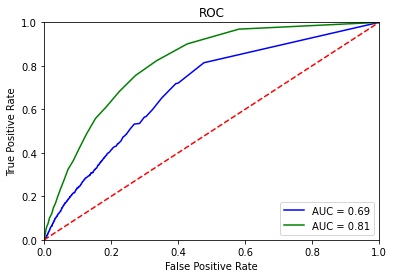

In [96]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
#kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
#cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
probs = lr_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

probs2 = lr_model2.predict_proba(X_test2)
preds2 = probs2[:,1]
fpr2, tpr2, threshold2 = metrics.roc_curve(y_test2, preds2)
roc_auc2 = metrics.auc(fpr2, tpr2)

import matplotlib.pyplot as plt
plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc, color='b')
plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.2f' % roc_auc2, color='g')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Text(0.5, 0, 'Relative Importance')

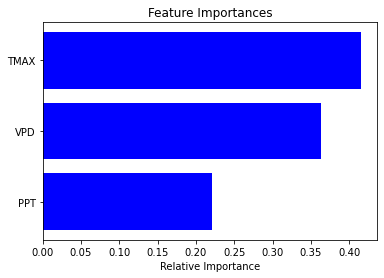

In [60]:
features=data.columns[[3,4,5]]
importances = lr_model.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

Text(0.5, 0, 'Relative Importance')

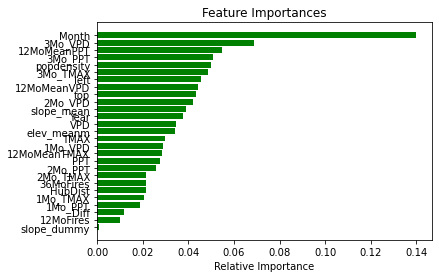

In [80]:
features=data2.columns[[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]]
#features=data2.columns[[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]]
#features=data2.columns[[6,7]]
importances = lr_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [97]:
import numpy as np

final_pred_data = pd.read_csv('/Users/alekseyvalouev/Desktop/FireData/CSV/final_table_3mofwd.csv')

final_pred_data = final_pred_data[(pd.to_datetime(final_pred_data['Date']).dt.strftime('%Y') == '2021') & (pd.to_datetime(final_pred_data['Date']).dt.strftime('%B') == 'May')]

pred_array = final_pred_data.values

X_pred = pred_array[:,3:30]

X_pred = X_pred.astype('float')

pred_probs = lr_model2.predict_proba(X_pred)

In [98]:
X_pred

array([[  6.6792857 ,  24.52342878,  14.82314287, ..., 142.80921374,
          0.8660254 ,   0.        ],
       [ 12.66166655,  23.39983368,  19.53733317, ..., 164.08690269,
          0.8660254 ,   0.        ],
       [ 14.93783347,  23.74616655,  20.96700001, ..., 178.4023337 ,
          0.8660254 ,   0.        ],
       ...,
       [  8.40825009,   0.81275   ,  18.97949982, ...,  12.35606254,
          0.8660254 ,   0.        ],
       [ 11.78224993,   0.72374999,  21.0625    , ...,  12.4409791 ,
          0.8660254 ,   0.        ],
       [ 13.63749981,   0.30600001,  21.8135004 , ...,  15.59462507,
          0.8660254 ,   0.        ]])

In [ ]:
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, Polygon

out = np.concatenate((X_pred[:,3:5], pred_probs), axis=1)

out_df = pd.DataFrame(out)

out_df

out_df.columns = out_df.columns.astype(str)

geometry = [Point(xy) for xy in zip(out_df["0"], out_df["1"])]

geo_poly = []

t = [[0, 0], [0, 0.1], [0.1, 0.1], [0.1, 0]]

for point in geometry:
    tmp = []
    for i in t:
        tmp.append([point.x + i[0], point.y + i[1]])
    
    geo_poly.append(Polygon(tmp))

In [ ]:
geo_df = gpd.GeoDataFrame(out_df, crs='epsg:4326', geometry=geo_poly)

geo_df

,0,1,2,3,geometry
0,-124.301341,42.055424,0.88,0.12,"POLYGON ((-124.30134 42.05542, -124.30134 42.1..."
1,-124.201341,42.055424,0.88,0.12,"POLYGON ((-124.20134 42.05542, -124.20134 42.1..."
2,-124.101341,42.055424,0.88,0.12,"POLYGON ((-124.10134 42.05542, -124.10134 42.1..."
3,-124.001341,42.055424,0.88,0.12,"POLYGON ((-124.00134 42.05542, -124.00134 42.1..."
4,-123.901341,42.055424,0.88,0.12,"POLYGON ((-123.90134 42.05542, -123.90134 42.1..."
...,...,...,...,...,...
4392,-115.701341,32.655424,0.88,0.12,"POLYGON ((-115.70134 32.65542, -115.70134 32.7..."
4393,-117.201341,32.555424,0.88,0.12,"POLYGON ((-117.20134 32.55542, -117.20134 32.6..."
4394,-117.101341,32.555424,0.88,0.12,"POLYGON ((-117.10134 32.55542, -117.10134 32.6..."
4395,-117.001341,32.555424,0.88,0.12,"POLYGON ((-117.00134 32.55542, -117.00134 32.6..."


In [ ]:
arr = out[:,-1]

mean = np.mean(arr)
median = np.median(arr)
max = np.max(arr)
min = np.min(arr)
 
print("Array =", arr)
print("Mean =", mean)
print("Median =", median)
print("Max =", max)
print("Min =", min)

Array = [0.12 0.12 0.12 ... 0.12 0.12 0.11]
Mean = 0.12184216511257673
Median = 0.12
Max = 0.15
Min = 0.08


In [114]:
from matplotlib.colors import Normalize

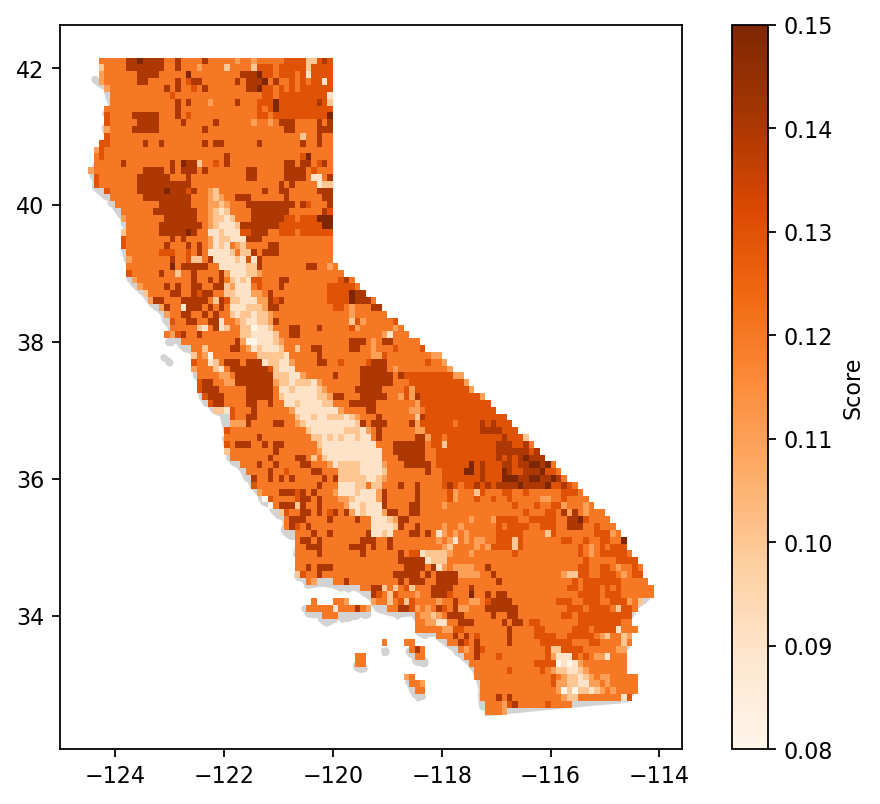

In [135]:
import geopandas as gpd
import matplotlib

norms = Normalize(vmin=np.min(geo_df["3"].unique()), vmax=np.max(geo_df["3"].unique()))
# initialize an axis
fig, ax = plt.subplots(figsize=(8,6), dpi=160)
# plot map on axis
state = gpd.read_file("/Users/alekseyvalouev/Desktop/FireData/California_SHP/CA_State_TIGER2016.shp")
state = state.to_crs(epsg=4326)
state[state["NAME"] == "California"].plot(color="lightgrey", ax=ax)

Reds = plt.get_cmap('Oranges')

geo_df.plot(color=Reds(norms(geo_df["3"])), ax = ax)

fig.colorbar(matplotlib.cm.ScalarMappable(norm=norms, cmap=Reds), orientation='vertical', label='Score')


plt.show()

In [134]:
ttprs = tprs
tfprs = fprs
t_probs = _probs

In [29]:
# Cross Validation

from numpy import array 
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import BorderlineSMOTE 
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import math

data2 = data2.sort_values(["Date", "newID"])
t=data2
#t = t[(pd.to_datetime(t['Date']).dt.strftime('%B') == 'May') | ]
tg = t.groupby('YYYYMM').cumcount()
g = data2.groupby('Year').cumcount()

In [30]:
L = (array(data2.set_index(['Year',g])
       .unstack(fill_value=0)
       .stack().groupby(level=0)
       .apply(lambda x: x.values.tolist())
       .tolist()))

Lt = (array(t.set_index(['YYYYMM',tg])
       .unstack(fill_value=0)
       .stack().groupby(level=0)
       .apply(lambda x: x.values.tolist())
       .tolist()))

print("Created array L.")

burnin = L[:int(math.floor(len(L)/2))]
val = L[int(math.floor(len(L)/2)):]
val_test = Lt[int(math.floor(len(L)/2))*12:]

burnin = np.concatenate(burnin, axis=0)

base_fpr = np

tprs = []
fprs = []
base_fpr = np.linspace(0, 1, 101)
_probs = []
aucs = []

Created array L.


Beginning iteration: 1/10
Iter_1: Preprocessing complete.
Iter_1: Model fitting complete.
Iter_1_1: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_1_2: Model prediction complete.
Iter_1_3: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_1_4: Model prediction complete.
Iter_1_5: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_1_6: Model prediction complete.
Iter_1_7: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_1_8: Model prediction complete.
Iter_1_9: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_1_10: Model prediction complete.
Iter_1_11: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_1_12: Model prediction complete.
Iter_1: Finished concat.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Finished iteration: 1
Beginning iteration: 2/10
Iter_2: Preprocessing complete.
Iter_2: Model fitting complete.
Iter_2_1: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_2_2: Model prediction complete.
Iter_2_3: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_2_4: Model prediction complete.
Iter_2_5: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_2_6: Model prediction complete.
Iter_2_7: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_2_8: Model prediction complete.
Iter_2_9: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_2_10: Model prediction complete.
Iter_2_11: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_2_12: Model prediction complete.
Iter_2: Finished concat.
Finished iteration: 2
Beginning iteration: 3/10
Iter_3: Preprocessing complete.
Iter_3: Model fitting complete.
Iter_3_1: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_3_2: Model prediction complete.
Iter_3_3: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_3_4: Model prediction complete.
Iter_3_5: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_3_6: Model prediction complete.
Iter_3_7: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_3_8: Model prediction complete.
Iter_3_9: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_3_10: Model prediction complete.
Iter_3_11: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_3_12: Model prediction complete.
Iter_3: Finished concat.
Finished iteration: 3
Beginning iteration: 4/10
Iter_4: Preprocessing complete.
Iter_4: Model fitting complete.
Iter_4_1: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_4_2: Model prediction complete.
Iter_4_3: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_4_4: Model prediction complete.
Iter_4_5: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_4_6: Model prediction complete.
Iter_4_7: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_4_8: Model prediction complete.
Iter_4_9: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_4_10: Model prediction complete.
Iter_4_11: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_4_12: Model prediction complete.
Iter_4: Finished concat.
Finished iteration: 4
Beginning iteration: 5/10
Iter_5: Preprocessing complete.
Iter_5: Model fitting complete.
Iter_5_1: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_5_2: Model prediction complete.
Iter_5_3: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_5_4: Model prediction complete.
Iter_5_5: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_5_6: Model prediction complete.
Iter_5_7: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_5_8: Model prediction complete.
Iter_5_9: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_5_10: Model prediction complete.
Iter_5_11: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_5_12: Model prediction complete.
Iter_5: Finished concat.
Finished iteration: 5
Beginning iteration: 6/10
Iter_6: Preprocessing complete.
Iter_6: Model fitting complete.
Iter_6_1: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_6_2: Model prediction complete.
Iter_6_3: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_6_4: Model prediction complete.
Iter_6_5: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_6_6: Model prediction complete.
Iter_6_7: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_6_8: Model prediction complete.
Iter_6_9: Model prediction complete.
Iter_6_10: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_6_11: Model prediction complete.
Iter_6_12: Model prediction complete.
Iter_6: Finished concat.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Finished iteration: 6
Beginning iteration: 7/10
Iter_7: Preprocessing complete.
Iter_7: Model fitting complete.
Iter_7_1: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_7_2: Model prediction complete.
Iter_7_3: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_7_4: Model prediction complete.
Iter_7_5: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_7_6: Model prediction complete.
Iter_7_7: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_7_8: Model prediction complete.
Iter_7_9: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_7_10: Model prediction complete.
Iter_7_11: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_7_12: Model prediction complete.
Iter_7: Finished concat.
Finished iteration: 7
Beginning iteration: 8/10
Iter_8: Preprocessing complete.
Iter_8: Model fitting complete.
Iter_8_1: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_8_2: Model prediction complete.
Iter_8_3: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_8_4: Model prediction complete.
Iter_8_5: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_8_6: Model prediction complete.
Iter_8_7: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_8_8: Model prediction complete.
Iter_8_9: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_8_10: Model prediction complete.
Iter_8_11: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_8_12: Model prediction complete.
Iter_8: Finished concat.
Finished iteration: 8
Beginning iteration: 9/10
Iter_9: Preprocessing complete.
Iter_9: Model fitting complete.
Iter_9_1: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_9_2: Model prediction complete.
Iter_9_3: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_9_4: Model prediction complete.
Iter_9_5: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_9_6: Model prediction complete.
Iter_9_7: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_9_8: Model prediction complete.
Iter_9_9: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_9_10: Model prediction complete.
Iter_9_11: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_9_12: Model prediction complete.
Iter_9: Finished concat.
Finished iteration: 9
Beginning iteration: 10/10
Iter_10: Preprocessing complete.
Iter_10: Model fitting complete.
Iter_10_1: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_10_2: Model prediction complete.
Iter_10_3: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_10_4: Model prediction complete.
Iter_10_5: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_10_6: Model prediction complete.
Iter_10_7: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_10_8: Model prediction complete.
Iter_10_9: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_10_10: Model prediction complete.
Iter_10_11: Model prediction complete.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Iter_10_12: Model prediction complete.
Iter_10: Finished concat.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/3843534340.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Finished iteration: 10


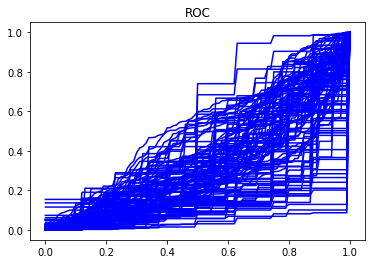

In [31]:
plt.title('ROC')

base_fpr = np.linspace(0, 1, 101)

for i in range(len(val)):
    
    print("Beginning iteration: %s/%s" % (i+1, len(val)))
    
    scaler = StandardScaler()

    b_X = burnin[:,3:30]
    b_y = burnin[:,-3]

    b_X = b_X.astype('float')
    b_y = b_y.astype('float').astype('bool')

    b_X = scaler.fit_transform(b_X)

    b_X, b_y = BorderlineSMOTE().fit_resample(b_X, b_y)
    
    print("Iter_%s: Preprocessing complete." %str(i+1))
    
    # calculate the fpr and tpr for all thresholds of the classification
    model = RandomForestClassifier(n_jobs=-1, max_depth=13, n_estimators=400)
    model = model.fit(b_X, b_y)
    
    print("Iter_%s: Model fitting complete." %str(i+1))
    
    for j in range(12):
        v_X = val_test[12*i+j,:,3:30]
        v_y = val_test[i,:,-3]

        v_X = v_X.astype('float')
        v_y = v_y.astype('float').astype('bool')

        v_X = scaler.fit_transform(v_X)

        probs = model.predict_proba(v_X)

        print("Iter_%s_%s: Model prediction complete." %(str(i+1), str(j+1)))

        preds = probs[:,1]
        _probs.append(probs)
        fpr, tpr, threshold = metrics.roc_curve(v_y, preds)
        tpr = np.interp(base_fpr, tpr, fpr)
        roc_auc = metrics.auc(base_fpr, tpr)
        plt.plot(base_fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')

        tprs.append(tpr)
        
        aucs.append(roc_auc)

    print("Iter_%s: Finished concat." %str(i+1))

    burnin = np.concatenate((burnin, val[i]), axis=0)
    
    print("Finished iteration: %s" %str(i+1))
    print("=====================================")

Beginning iteration: 1/10
Iter_0: Preprocessing complete.
Iter_0: Model fitting complete.
Iter_0: Model prediction complete.
Iter_0: Finished concat.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_97026/1761898223.py:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Finished iteration: 0
Beginning iteration: 2/10
Iter_1: Preprocessing complete.
Iter_1: Model fitting complete.
Iter_1: Model prediction complete.
Iter_1: Finished concat.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_97026/1761898223.py:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Finished iteration: 1
Beginning iteration: 3/10
Iter_2: Preprocessing complete.
Iter_2: Model fitting complete.
Iter_2: Model prediction complete.
Iter_2: Finished concat.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_97026/1761898223.py:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Finished iteration: 2
Beginning iteration: 4/10
Iter_3: Preprocessing complete.
Iter_3: Model fitting complete.
Iter_3: Model prediction complete.
Iter_3: Finished concat.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_97026/1761898223.py:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Finished iteration: 3
Beginning iteration: 5/10
Iter_4: Preprocessing complete.
Iter_4: Model fitting complete.
Iter_4: Model prediction complete.
Iter_4: Finished concat.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_97026/1761898223.py:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Finished iteration: 4
Beginning iteration: 6/10
Iter_5: Preprocessing complete.
Iter_5: Model fitting complete.
Iter_5: Model prediction complete.
Iter_5: Finished concat.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_97026/1761898223.py:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Finished iteration: 5
Beginning iteration: 7/10
Iter_6: Preprocessing complete.
Iter_6: Model fitting complete.
Iter_6: Model prediction complete.
Iter_6: Finished concat.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_97026/1761898223.py:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Finished iteration: 6
Beginning iteration: 8/10
Iter_7: Preprocessing complete.
Iter_7: Model fitting complete.
Iter_7: Model prediction complete.
Iter_7: Finished concat.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_97026/1761898223.py:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Finished iteration: 7
Beginning iteration: 9/10
Iter_8: Preprocessing complete.
Iter_8: Model fitting complete.
Iter_8: Model prediction complete.
Iter_8: Finished concat.


/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_97026/1761898223.py:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Finished iteration: 8
Beginning iteration: 10/10
Iter_9: Preprocessing complete.
Iter_9: Model fitting complete.
Iter_9: Model prediction complete.
Iter_9: Finished concat.


/Users/alekseyvalouev/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_97026/1761898223.py:44: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')


Finished iteration: 9


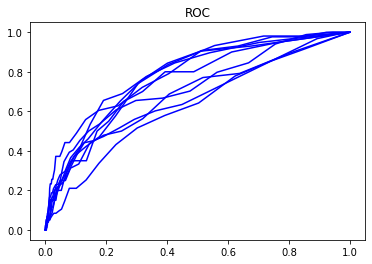

In [ ]:
plt.title('ROC')

for i in range(len(val)):
    
    print("Beginning iteration: %s/%s" % (i+1, len(val)))
    
    scaler = StandardScaler()

    b_X = burnin[:,3:30]
    b_y = burnin[:,-3]

    b_X = b_X.astype('float')
    b_y = b_y.astype('float').astype('bool')

    b_X = scaler.fit_transform(b_X)

    v_X = val_test[i,:,3:30]
    v_y = val_test[i,:,-3]

    v_X = v_X.astype('float')
    v_y = v_y.astype('float').astype('bool')

    v_X = scaler.fit_transform(v_X)

    b_X, b_y = BorderlineSMOTE().fit_resample(b_X, b_y)
    
    print("Iter_%s: Preprocessing complete." %i)
    
    # calculate the fpr and tpr for all thresholds of the classification
    model = RandomForestClassifier(n_jobs=-1)
    model = model.fit(b_X, b_y)
    
    print("Iter_%s: Model fitting complete." %i)
    
    probs = model.predict_proba(v_X)
    
    print("Iter_%s: Model prediction complete." %i)
    
    preds = probs[:,1]
    _probs.append(probs)
    fpr, tpr, threshold = metrics.roc_curve(v_y, preds)
    fprs.append(fpr)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
    
    tprs.append(tpr)
    
    print("Iter_%s: Finished concat." %i)
    
    burnin = np.concatenate((burnin, val[i]), axis=0)
    
    print("Finished iteration: %s" %i)
    print("=====================================")

/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/1832198086.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(tprs[i], base_fpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/1832198086.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(tprs[i], base_fpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/1832198086.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(tprs[i], base_fpr, 'b', label = 'AUC_%s = %0.2f' % (i, r

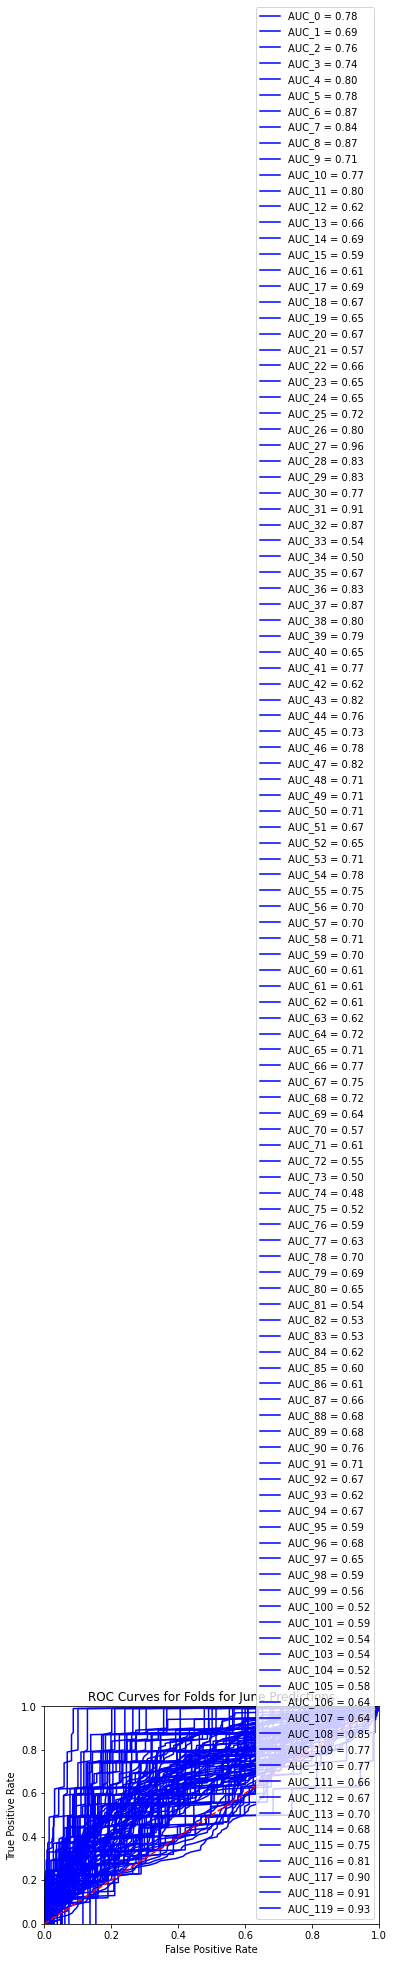

In [37]:
#

base_fpr = np.linspace(0, 1, 101)

t_aucs = []

for i in range(len(tprs)):
    #t_tpr = np.interp(base_fpr, tprs[i], fprs[i])
    roc_auc = metrics.auc(tprs[i], base_fpr)
    t_aucs.append(roc_auc)
    plt.plot(tprs[i], base_fpr, 'b', label = 'AUC_%s = %0.2f' % (i, roc_auc), color='b')
    
plt.title('ROC Curves for Folds for June Predictions')
    
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
    
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [39]:
np.mean(t_aucs)

0.6923483419487226

In [54]:
summer_aucs = []
avgs = []
for i in range(len(aucs)):
    if ((i%12) == 5 or (i%12) == 6 or (i%12) == 7 or (i%12) == 8):
        summer_aucs.append(aucs[i])
        
for i in range(int(len(summer_aucs)/4)):
    avgs.append(1-np.mean(np.array([summer_aucs[4*i], summer_aucs[4*i+1], summer_aucs[4*i+2], summer_aucs[4*i+3]])))
                
print(avgs)
        
np.mean(avgs)

[0.838315960355434, 0.6682078965360072, 0.8447510822510822, 0.7428852524560201, 0.7358367145838164, 0.7375737000928505, 0.6672240449964847, 0.7054186795491144, 0.5485248571428571, 0.7338903119307832]


0.722262849989445

In [63]:
print(list(np.subtract([1]*len(summer_aucs), summer_aucs)))

[0.7825244930508088, 0.8659785828206881, 0.8360150375939849, 0.8687457279562543, 0.6867582041932543, 0.6660562898814949, 0.652894257064722, 0.6671228350045579, 0.8323775347459559, 0.7703588516746411, 0.9058737753474595, 0.8703941672362725, 0.7692072195567741, 0.6225428375599725, 0.822486863148275, 0.7573040895590588, 0.712964293994899, 0.778329469047067, 0.7486424762346395, 0.70341061905866, 0.7119568245125348, 0.7669336118848653, 0.7525116063138347, 0.7188927576601671, 0.6310464026247949, 0.6957897820482775, 0.6900316381532692, 0.652028357159597, 0.6824005060961583, 0.7595456636760984, 0.7138049229353578, 0.6659236254888429, 0.58832, 0.5443954285714285, 0.5400925714285714, 0.5212914285714286, 0.6962158469945355, 0.6814947632058286, 0.7527459016393443, 0.8051047358834245]


In [69]:
auc_formed = list(np.subtract([1]*len(aucs), aucs))

o = []

for i in range(int(len(auc_formed)/12)):
    t = []
    for j in range(12):
        t.append(auc_formed[10*i+j])
    o.append(t)
    
pd.DataFrame(o).transpose().to_csv('/Users/alekseyvalouev/Desktop/FireData/Scripts/1.csv', index=False)

In [44]:
summer_aucs = []
for i in range(len(aucs)):
    if ((i%12) != 4 and (i%12) != 5 and (i%12) != 6 and (i%12) != 7 and (i%12) != 8):
        summer_aucs.append(aucs[i])
        
1-np.mean(summer_aucs)

0.6781997188656772

In [ ]:
_v_y

array(['0.0', '0.0', '0.0', ..., '0.0', '0.0', '0.0'], dtype='<U32')

/var/folders/tn/1hx74qln26x7jlmq6t6mlyqm0000gn/T/ipykernel_1111/1146683063.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % (roc_auc), color='orange')


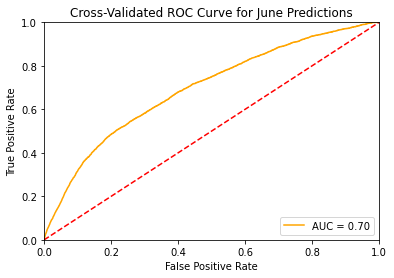

In [33]:
t_probs = np.concatenate(np.array(_probs), axis=0)
preds = t_probs[:,1]

_v_y = np.concatenate(val_test[:,:,-3], axis=0).astype('float')

fpr, tpr, threshold = metrics.roc_curve(_v_y, preds)
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % (roc_auc), color='orange')

plt.title('Cross-Validated ROC Curve for June Predictions')

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
    
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
t_probs

Note: you may need to restart the kernel to use updated packages.


In [ ]:
t_probs.shape

(43970, 2)

In [72]:
filter = _v_y == 0.0

In [73]:
from scipy.interpolate import interp1d

scores = sorted(t_probs[filter, 1])

inc = 1/(len(scores)-1)
fractions = np.arange(0, 1 + inc, inc)
fractions = fractions[0:len(scores)]

score_curve = interp1d(fractions, scores)

perf_metrics = [[0.9, None], [0.95, None], [0.98, None]]

for i, metric in enumerate(perf_metrics):
    perf_metrics[i][1] = round(float(score_curve(metric[0])), 2)
    print("spec: " + str(metric[0]) + " score cutoff: " + str(perf_metrics[i][1]))

spec: 0.9 score cutoff: 0.53
spec: 0.95 score cutoff: 0.65
spec: 0.98 score cutoff: 0.75


In [74]:
filter = _v_y == 1.0
num_pos = np.sum(t_probs[filter, 1] > perf_metrics[0][1])
num_total = np.sum(filter)
sens = np.round(float(num_pos) / float(num_total), 2)
sens

0.31

In [ ]:
t_probs

array([[0.895298  , 0.104702  ],
       [0.92723357, 0.07276643],
       [0.8794815 , 0.1205185 ],
       ...,
       [0.94483561, 0.05516439],
       [0.94485918, 0.05514082],
       [0.94775405, 0.05224595]])

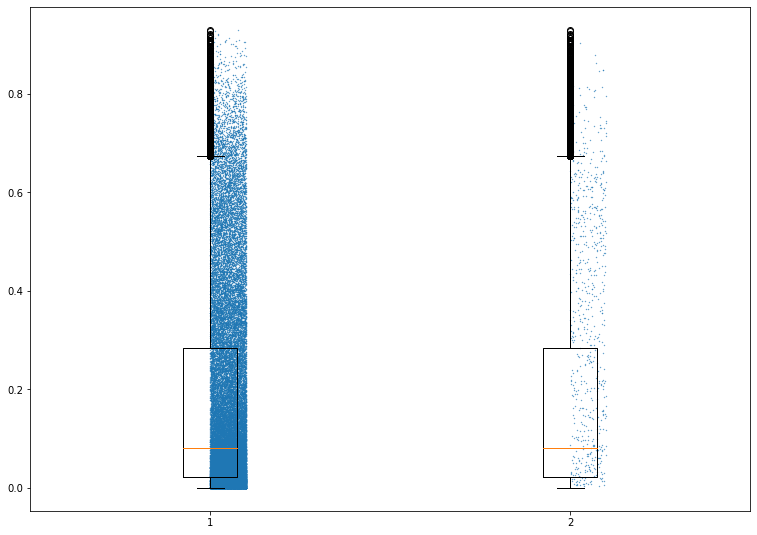

In [ ]:
import random

fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

ax.boxplot([t_probs[:,1], t_probs[:,1]])
ax.scatter(np.add(_v_y, np.random.default_rng().uniform(0,0.1,len(_v_y)))+1, t_probs[:, 1],s=0.1)
#plt.plot([0]*len(t_probs[:,0]), t_probs[:,0])
plt.show()

In [ ]:
pd.DataFrame(t_probs[:,0]).describe(percentiles=[0.01,0.05,0.10,0.50,0.80,0.90,0.95,0.98,0.99])

,0
count,43970.000000
mean,0.953350
std,0.053219
min,0.180000
1%,0.740000
5%,0.870000
10%,0.900000
50%,0.970000
80%,0.990000
90%,1.000000


In [ ]:
out = []

for i in t_probs[:, 1]:
    if (i >= 0.26):
        out.append(1.0)
    else:
        out.append(0.0)
        
out = np.array(out)

print(1-((out != _v_y).sum()/len(out)))

print(str(len(out)-(out != _v_y).sum()) + "/" + str(len(out)))

0.976415738003184
42933/43970
